In [2]:
# Import MINST data 
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("E:/tmp/data/", one_hot=True)

import tensorflow as tf 
import matplotlib.pyplot as plt

# Parameters 
learning_rate = 0.01 
training_epochs = 25 
batch_size = 100 
display_step = 1

# tf Graph Input 
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784 
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

# Create model
# Set model weights 
W = tf.Variable(tf.zeros([784, 10])) 
b = tf.Variable(tf.zeros([10])) 

# Construct model 
activation = tf.nn.softmax(tf.matmul(x, W) + b) 

# Softmax # Minimize error using cross entropy 
cross_entropy = y*tf.log(activation) 
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy,reduction_indices=1)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

#Plot settings 
avg_set = [] 
epoch_set=[] 

# Initializing the variables 
init = tf.initialize_all_variables()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch: 0001 cost= 1.176267532
Training phase finished


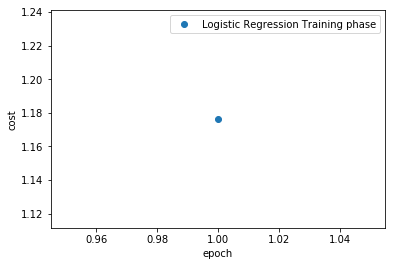

Model accuracy: 0.8525
Epoch: 0002 cost= 0.662405589
Training phase finished


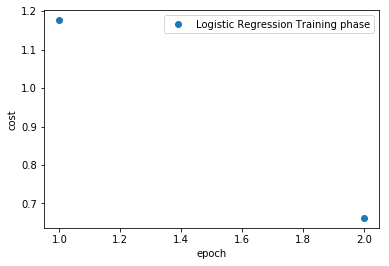

Model accuracy: 0.8749
Epoch: 0003 cost= 0.550607867
Training phase finished


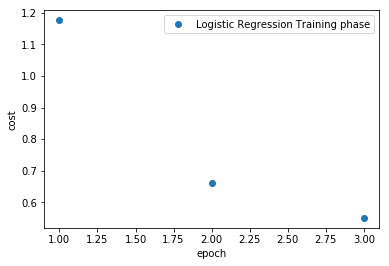

Model accuracy: 0.8817
Epoch: 0004 cost= 0.496721542
Training phase finished


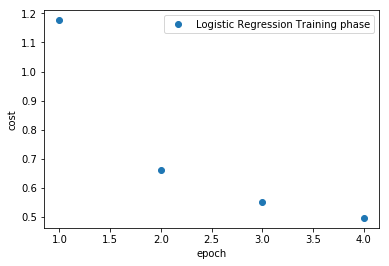

Model accuracy: 0.8878
Epoch: 0005 cost= 0.463728193
Training phase finished


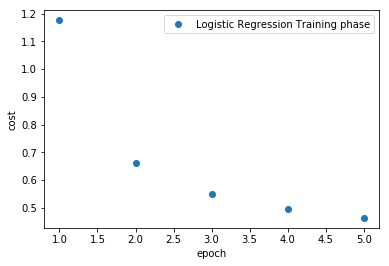

Model accuracy: 0.8917
Epoch: 0006 cost= 0.440925679
Training phase finished


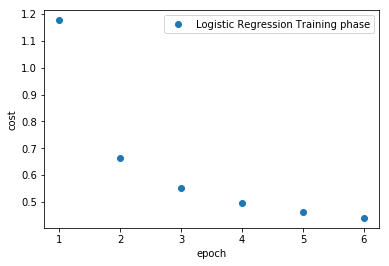

Model accuracy: 0.8948
Epoch: 0007 cost= 0.423967082
Training phase finished


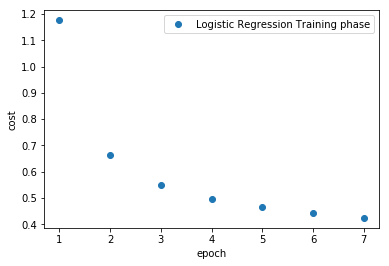

Model accuracy: 0.898
Epoch: 0008 cost= 0.410630672
Training phase finished


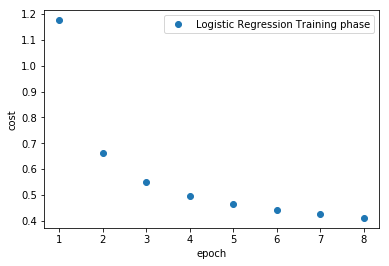

Model accuracy: 0.9
Epoch: 0009 cost= 0.399908055
Training phase finished


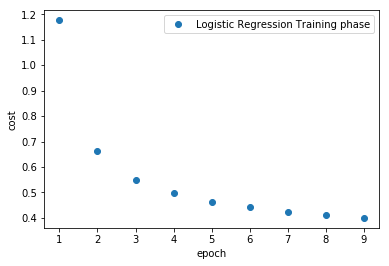

Model accuracy: 0.9015
Epoch: 0010 cost= 0.390928042
Training phase finished


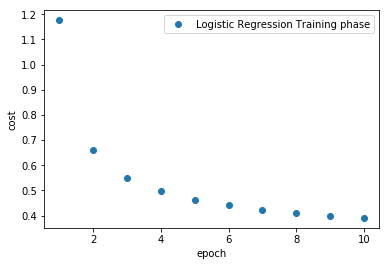

Model accuracy: 0.903
Epoch: 0011 cost= 0.383294201
Training phase finished


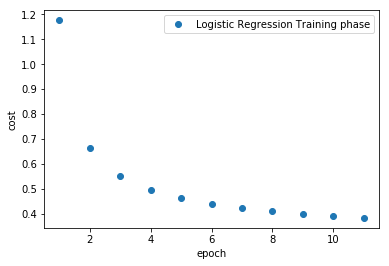

Model accuracy: 0.9032
Epoch: 0012 cost= 0.376745098
Training phase finished


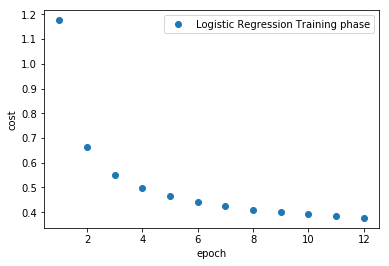

Model accuracy: 0.9056
Epoch: 0013 cost= 0.371001886
Training phase finished


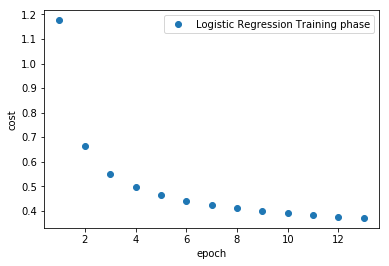

Model accuracy: 0.9073
Epoch: 0014 cost= 0.365935704
Training phase finished


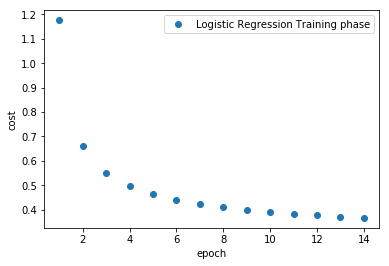

Model accuracy: 0.9074
Epoch: 0015 cost= 0.361326811
Training phase finished


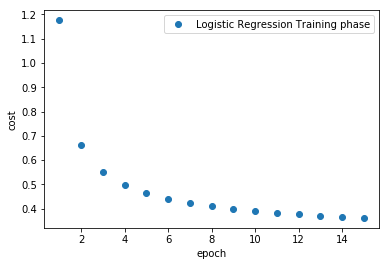

Model accuracy: 0.9079
Epoch: 0016 cost= 0.357293090
Training phase finished


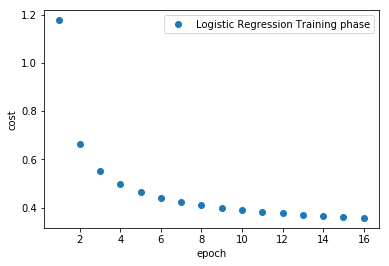

Model accuracy: 0.909
Epoch: 0017 cost= 0.353569183
Training phase finished


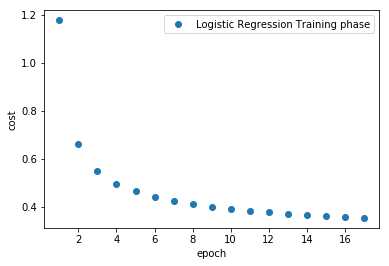

Model accuracy: 0.9097
Epoch: 0018 cost= 0.350166022
Training phase finished


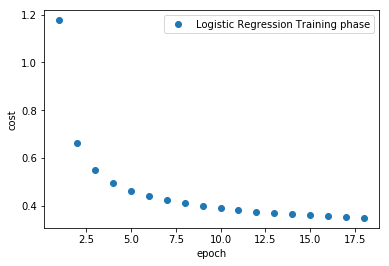

Model accuracy: 0.9104
Epoch: 0019 cost= 0.347044206
Training phase finished


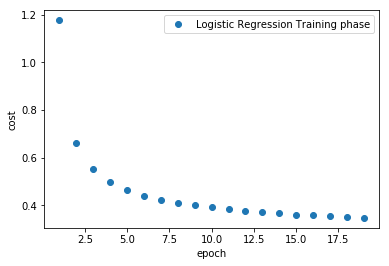

Model accuracy: 0.9109
Epoch: 0020 cost= 0.344166429
Training phase finished


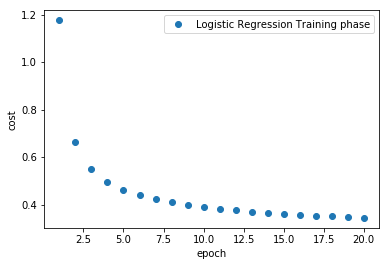

Model accuracy: 0.9114
Epoch: 0021 cost= 0.341471459
Training phase finished


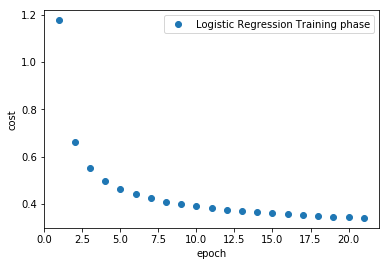

Model accuracy: 0.9125
Epoch: 0022 cost= 0.339015440
Training phase finished


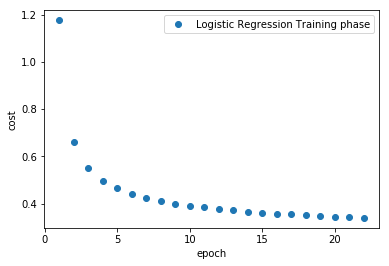

Model accuracy: 0.9126
Epoch: 0023 cost= 0.336626136
Training phase finished


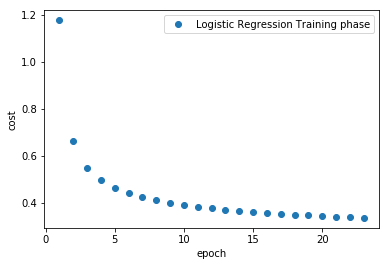

Model accuracy: 0.9133
Epoch: 0024 cost= 0.334518952
Training phase finished


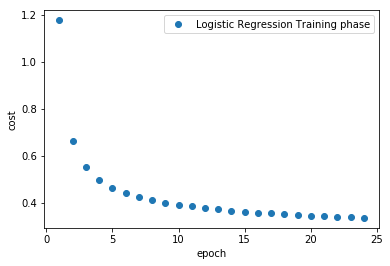

Model accuracy: 0.9138
Epoch: 0025 cost= 0.332463130
Training phase finished


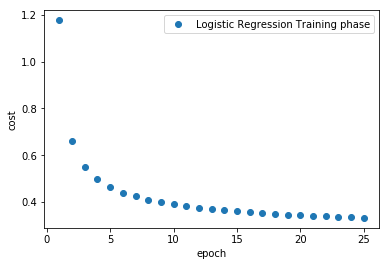

Model accuracy: 0.9133


In [9]:
# Launch the graph 
with tf.Session() as sess: 
    sess.run(init) 
    # Training cycle 
    for epoch in range(training_epochs): 
        avg_cost = 0. 
        total_batch = int(mnist.train.num_examples/batch_size) 
        # Loop over all batches 
        for i in range(total_batch): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            # Fit training using batch data 
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys}) 
            # Compute average loss 
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step 
        if epoch % display_step == 0:
            print("Epoch:",'%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost) 
        epoch_set.append(epoch+1)
        print ("Training phase finished") 
        plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training phase')
        plt.ylabel('cost')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()
                   
        # Test model
        correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
        # Calculate accuracy 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) 
        print ("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))